In [82]:
from n_mirror_cavity_classes_ter import Mirror, Subcavity, Cavity_sym, Cavity_num
from sympy import Symbol, symbols, Derivative
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
sp.init_printing(use_unicode=True)
sp.init_session(quiet=True)
from scipy.signal import find_peaks
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap


In [83]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]

# MATE

#### MATE: varying dL

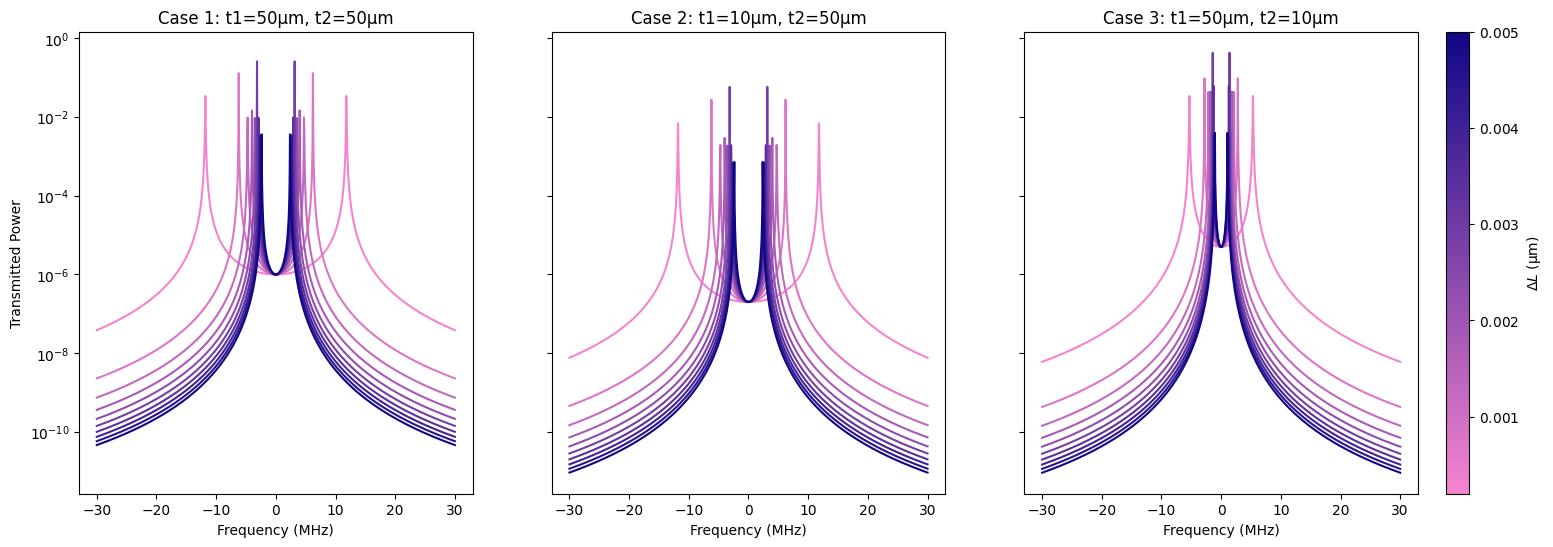

In [12]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])

mirror_vals_list = [
    {t1: 50e-6, t2: 50e-6, t3: 1e-6},
    {t1: 10e-6, t2: 50e-6, t3: 1e-6},
    {t1: 50e-6, t2: 10e-6, t3: 1e-6}
]

dL = np.linspace(200e-6, 5000e-6, 10)
nu_range = np.linspace(-30e6, 30e6, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots side by side
titles = ["Case 1: t1=50μm, t2=50μm", "Case 2: t1=10μm, t2=50μm", "Case 3: t1=50μm, t2=10μm"]
norm = mcolors.Normalize(vmin=dL.min(), vmax=dL.max())  
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)  
sm.set_array([])  

for ax, mirror_vals, title in zip(axes, mirror_vals_list, titles):
    colors = custom_cmap(np.linspace(0, 1, len(dL)))  
    for idx, d in enumerate(dL):
        subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
        cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
        ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

        ax.plot(ranges / (2*np.pi) * 1e-6, np.abs(values), color=colors[idx])

    ax.set_yscale("log")
    ax.set_xlabel("Frequency (MHz)")
    ax.set_title(title)

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02, location="right")
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$\Delta L$ (μm)")

axes[0].set_ylabel("Transmitted Power")

plt.show()


#### Mate: varying T1

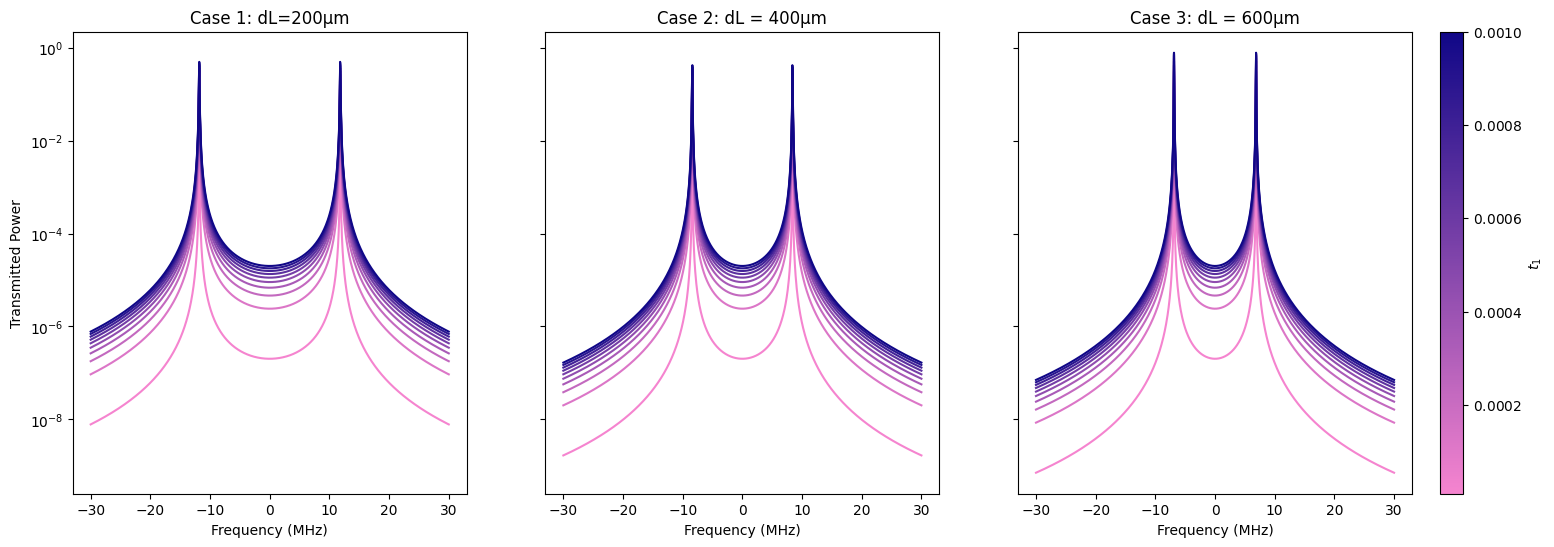

In [18]:
dL = [200e-6, 400e-6, 600e-6]
t1s = np.linspace(10e-6, 1000e-6, 10)
nu_range = np.linspace(-30e6, 30e6, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots side by side
titles = ["Case 1: dL=200μm", "Case 2: dL = 400μm", "Case 3: dL = 600μm"]
norm = mcolors.Normalize(vmin=t1s.min(), vmax=t1s.max())  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)  
sm.set_array([])  

for ax, d, title in zip(axes, dL, titles):
    colors = custom_cmap(np.linspace(0, 1, len(t1s)))  
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}

    for idx, t in enumerate(t1s):
        mirror_vals = {t1: float(t), t2: 50e-6, t3: 1e-6}
        cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
        ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

        ax.plot(ranges / (2*np.pi) * 1e-6, np.abs(values), color=colors[idx])

    ax.set_yscale("log")
    ax.set_xlabel("Frequency (MHz)")
    ax.set_title(title)

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02, location="right")
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_1$")

axes[0].set_ylabel("Transmitted Power")

plt.show()


#### MATE: varying t2

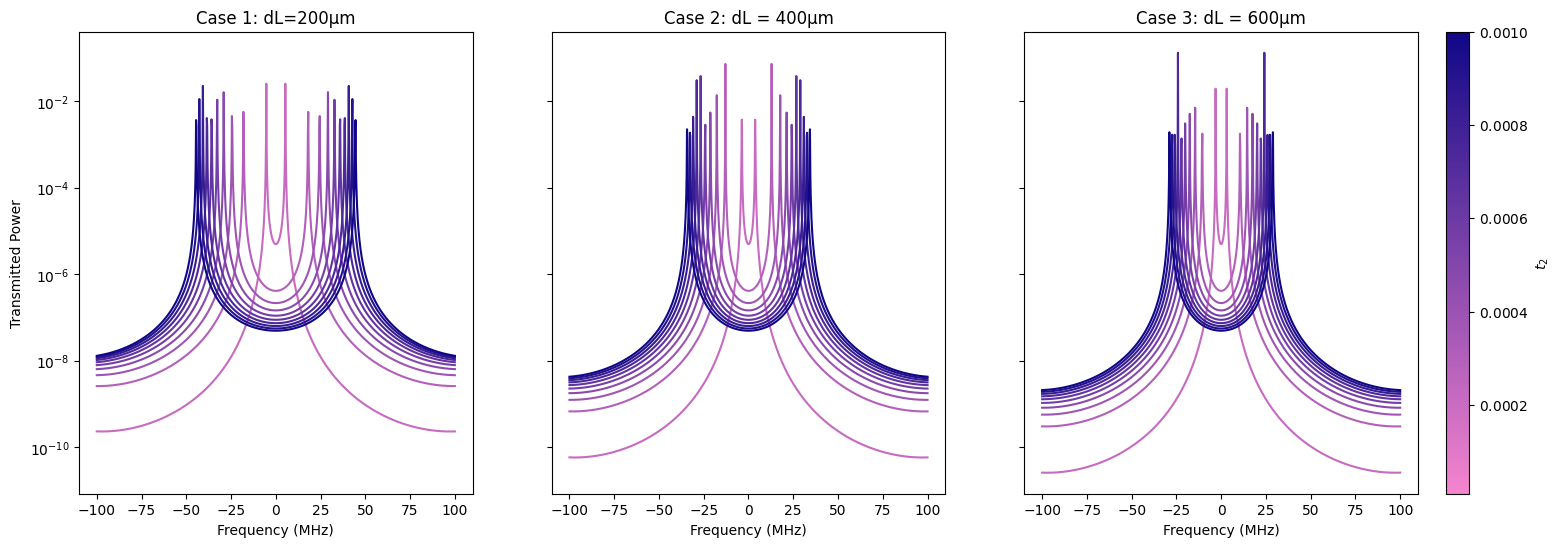

In [19]:
dL = [200e-6, 400e-6, 600e-6]
t2s = np.linspace(10e-6, 1000e-6, 10)
nu_range = np.linspace(-100e6, 100e6, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots side by side
titles = ["Case 1: dL=200μm", "Case 2: dL = 400μm", "Case 3: dL = 600μm"]
norm = mcolors.Normalize(vmin=t2s.min(), vmax=t2s.max())  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)  
sm.set_array([])  

for ax, d, title in zip(axes, dL, titles):
    colors = custom_cmap(np.linspace(0.2, 1, len(t2s)))
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}

    for idx, t in enumerate(t2s):
        mirror_vals = {t1: 50e-6, t2: t, t3: 1e-6}
        cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
        ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

        ax.plot(ranges / (2*np.pi) * 1e-6, np.abs(values), color=colors[idx])

    ax.set_yscale("log")
    ax.set_xlabel("Frequency (MHz)")
    ax.set_title(title)

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02, location="right")
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_2$")

axes[0].set_ylabel("Transmitted Power")
plt.show()


# MIM

#### MIM: varying dL

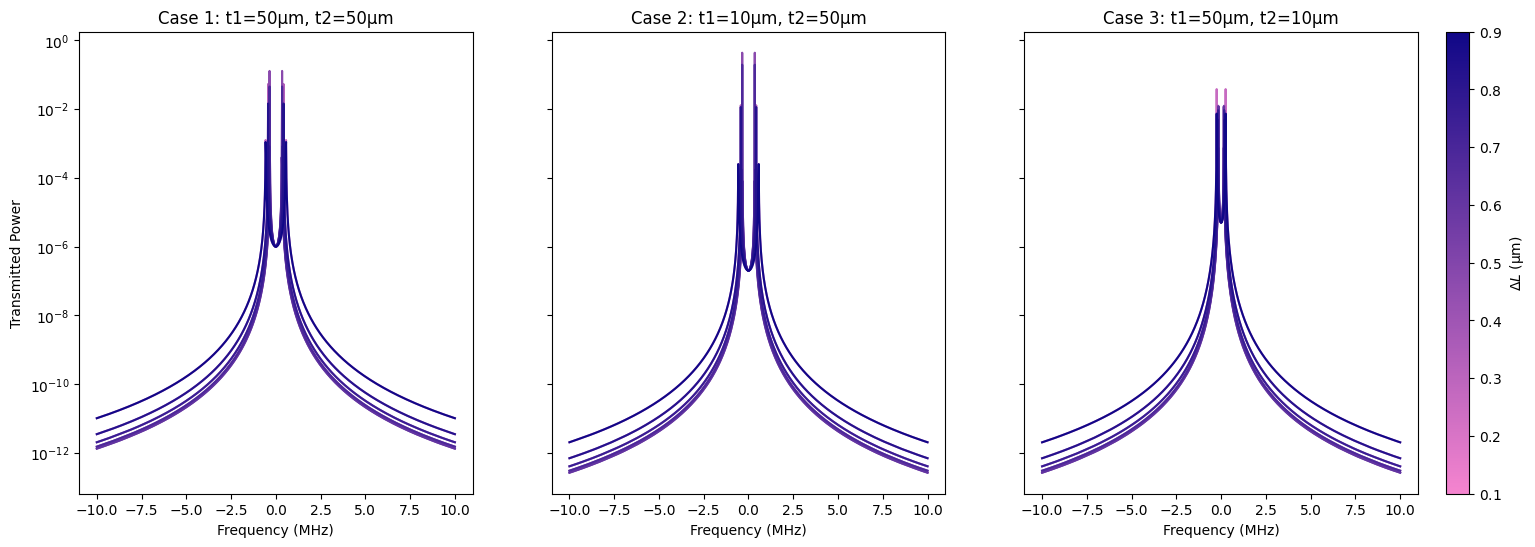

In [20]:
mirror_vals_list = [
    {t1: 50e-6, t2: 50e-6, t3: 1e-6},
    {t1: 10e-6, t2: 50e-6, t3: 1e-6},
    {t1: 50e-6, t2: 10e-6, t3: 1e-6}
]

dL = np.linspace(0.1, 0.9, 10)
nu_range = np.linspace(-10e6, 10e6, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots side by side
titles = ["Case 1: t1=50μm, t2=50μm", "Case 2: t1=10μm, t2=50μm", "Case 3: t1=50μm, t2=10μm"]
norm = mcolors.Normalize(vmin=dL.min(), vmax=dL.max())  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)  
sm.set_array([])  

for ax, mirror_vals, title in zip(axes, mirror_vals_list, titles):
    colors = custom_cmap(np.linspace(0.2, 1, len(dL)))
    
    for idx, d in enumerate(dL):
        subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}
        cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
        ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

        ax.plot(ranges / (2*np.pi) * 1e-6, np.abs(values), color=colors[idx])

    ax.set_yscale("log")
    ax.set_xlabel("Frequency (MHz)")
    ax.set_title(title)

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02, location="right")
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$\Delta L$ (μm)")

axes[0].set_ylabel("Transmitted Power")

plt.show()


#### MIM: varying t1

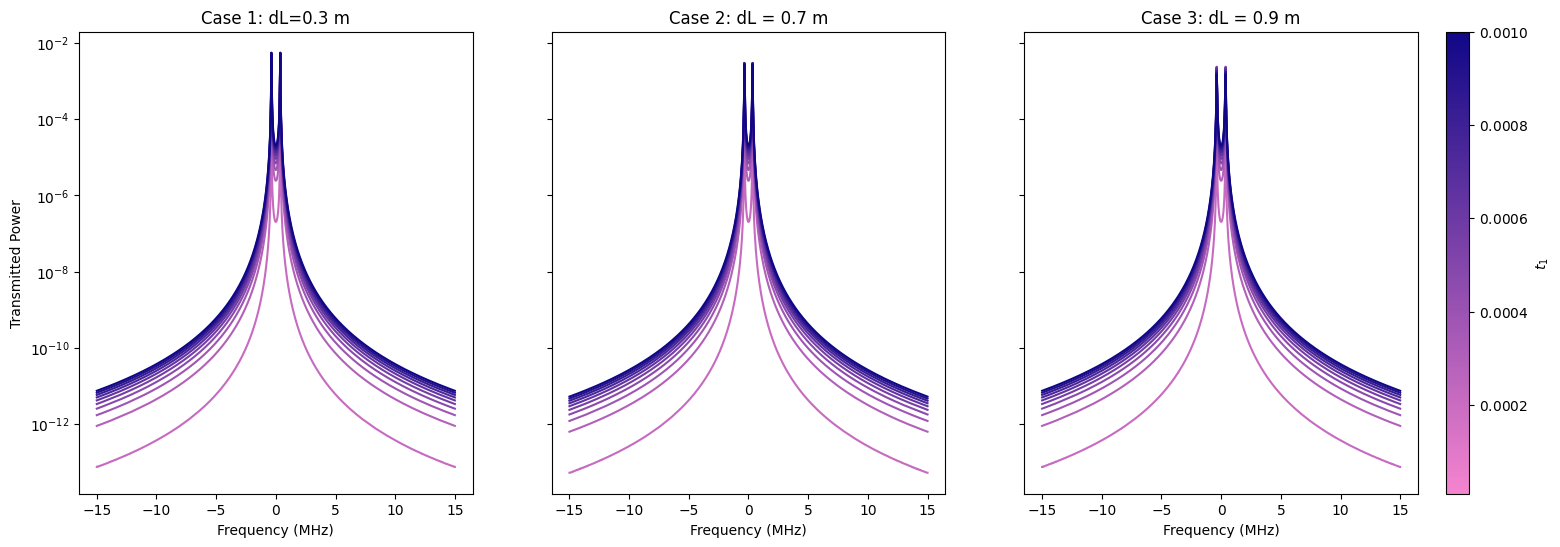

In [21]:
dL = [0.3, 0.5, 0.7]
t1s = np.linspace(10e-6, 1000e-6, 10)
nu_range = np.linspace(-15e6, 15e6, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots side by side
titles = ["Case 1: dL=0.3 m", "Case 2: dL = 0.7 m", "Case 3: dL = 0.9 m"]
norm = mcolors.Normalize(vmin=t2s.min(), vmax=t2s.max())  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)  
sm.set_array([])  

for ax, d, title in zip(axes, dL, titles):
    colors = custom_cmap(np.linspace(0.2, 1, len(t1s)))
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}

    for idx, t in enumerate(t1s):
        mirror_vals = {t1: float(t), t2: 50e-6, t3: 1e-6}
        cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
        ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

        ax.plot(ranges / (2*np.pi) * 1e-6, np.abs(values), color=colors[idx])

    ax.set_yscale("log")
    ax.set_xlabel("Frequency (MHz)")
    ax.set_title(title)

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02, location="right")
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_1$")

axes[0].set_ylabel("Transmitted Power")

plt.show()


#### MIM: varying t2

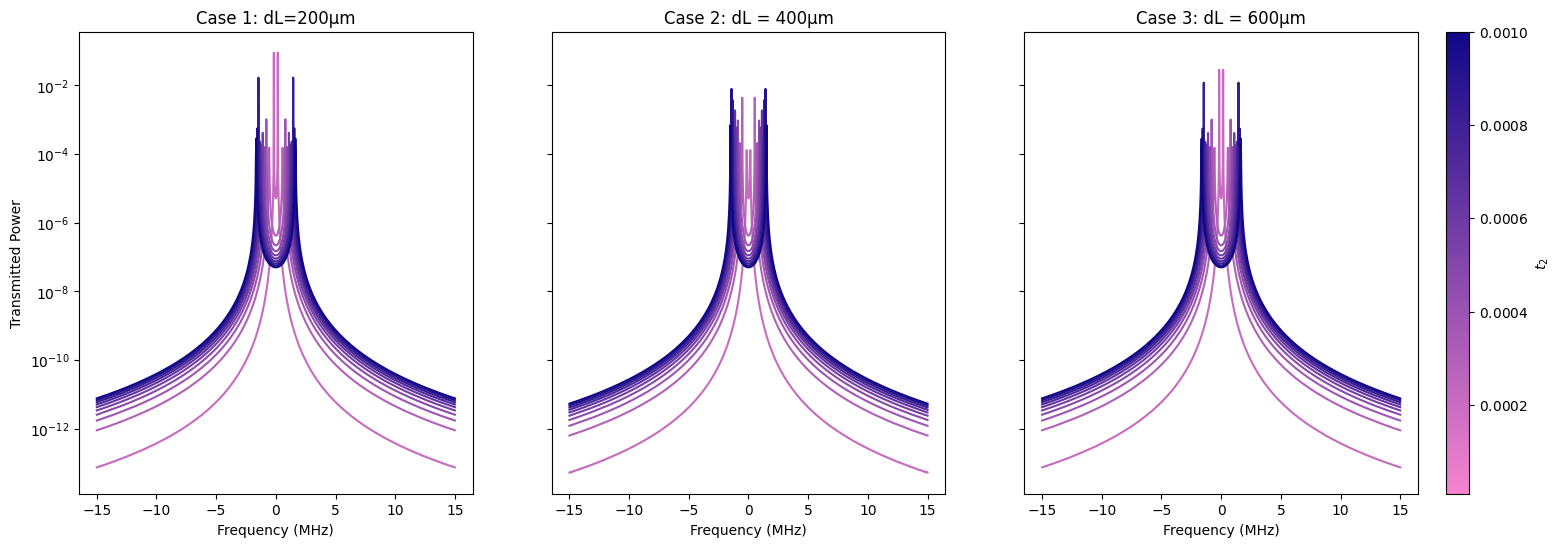

In [22]:
dL = [0.3, 0.5, 0.7]
t2s = np.linspace(10e-6, 1000e-6, 10)
nu_range = np.linspace(-15e6, 15e6, 1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True) 
titles = ["Case 1: dL=200μm", "Case 2: dL = 400μm", "Case 3: dL = 600μm"]

norm = mcolors.Normalize(vmin=t2s.min(), vmax=t2s.max())  
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#f584cf", "#100787"])
sm = cm.ScalarMappable(cmap=custom_cmap, norm=norm)  
sm.set_array([])  

for ax, d, title in zip(axes, dL, titles):
    colors = custom_cmap(np.linspace(0.2, 1, len(t2s)))
    subs_dict_num = {L1: 1-d, delta1: 0, L2: d, delta2: 0}

    for idx, t in enumerate(t2s):
        mirror_vals = {t1: 50e-6, t2: t, t3: 1e-6}
        cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
        ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])

        ax.plot(ranges / (2*np.pi) * 1e-6, np.abs(values), color=colors[idx])

    ax.set_yscale("log")
    ax.set_xlabel("Frequency (MHz)")
    ax.set_title(title)


cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02, location="right")
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
cbar.set_label(r"$t_2$")


axes[0].set_ylabel("Transmitted Power")
plt.show()


#### MATE

In [48]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

dL = 800e-6

#once i hit 600 the phase response changes ???

subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
subs_dict_num = {L1: 1-dL, delta1:0, L2:dL, delta2: 0}
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
# mirror_vals = {t1: 0.1, t2: 0.1, t3: 0.1}
mirror_vals = {t1: 50e-6, t2: 0.1, t3: 1e-6}
# 10 ppm
cavity_sym = Cavity_sym(mirror_ts, subs_dict)

cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)

-188.49557803436576 188.4955781279925


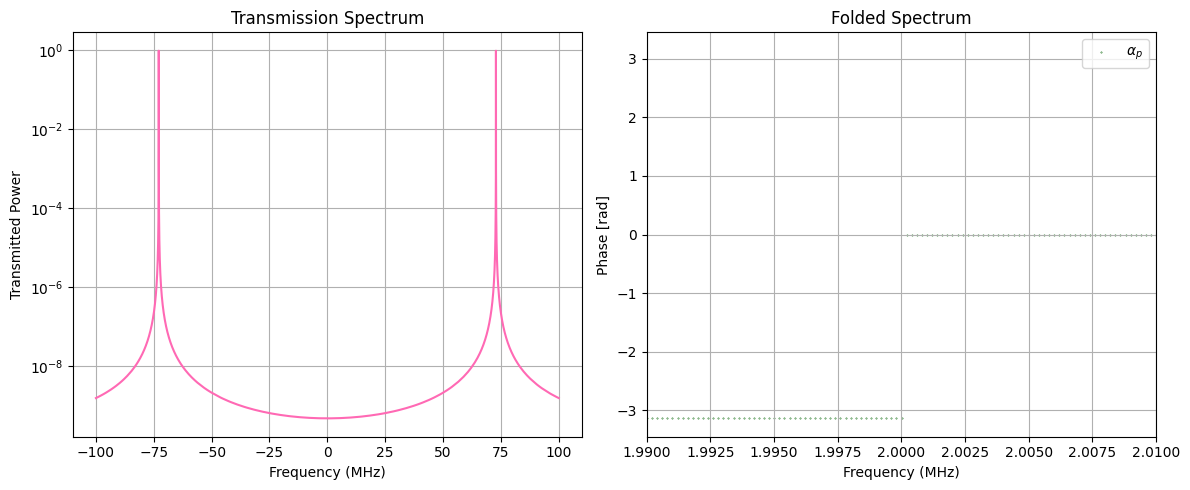

In [52]:
nu_range = np.linspace(-100e6, 100e6, 10000000)
detuning = -2e6  # Detuning value

# Compute transmission power spectrum
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
print(res_1, res_2)

# Compute folded spectrum
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)

# Create subplots: Transmission power (left) and Folded spectrum (right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ranges / (2*np.pi) * 1e-6, values, color = "hotpink")
axes[0].set_yscale("log")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Transmitted Power")
axes[0].set_title("Transmission Spectrum")
axes[0].grid()

axes[1].scatter(ranges_folded[::10] / (2*np.pi) * 1e-6, values_folded[::10], c="darkgreen", label=r"$\alpha_p$", s = 0.1)
axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_ylabel("Phase [rad]")
axes[1].set_title("Folded Spectrum")
axes[1].legend()
axes[1].grid()
axes[1].set_xlim(1.99, 2.01) 



# Adjust layout and show
plt.tight_layout()
plt.show()


##### reflected phase (folded spectrum)

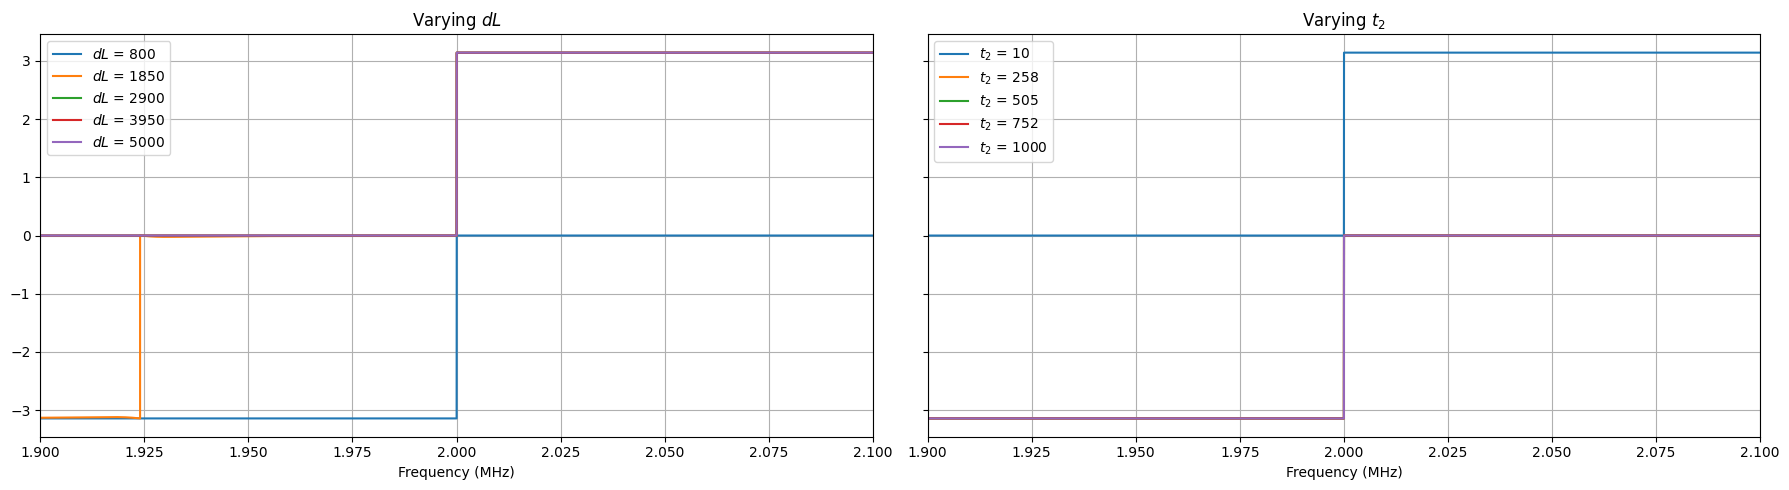

In [81]:
detuning_values = np.linspace(-3e6, 3e6, 5)  # Varying detuning
dL_values = np.linspace(800e-6, 5000e-6, 5)  # Varying dL
t2_values = np.linspace(10e-6, 1000e-6, 5)  # Varying t2

# Fixed values
dL_fixed = 800e-6
t1_fixed = 50e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6  # Fixed detuning when varying dL/t2

nu_range = np.linspace(-10e6, 10e6, 10000000)

fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
titles = ["Varying Detuning", "Varying $dL$", "Varying $t_2$"]


for dL in dL_values:
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                        {L1: 1-dL, delta1: 0, L2: dL, delta2: 0}, 
                        subs_dict, 
                        {L1: 1-dL, delta1: 0, L2: dL, delta2: 0}, 
                        [omega])
    
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes[0].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, label=f"$dL$ = {dL*1e6:.0f}")

axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_title(titles[1])
axes[0].legend()
axes[0].grid()
axes[0].set_xlim(1.9, 2.1)

# --- Third Graph: Varying t2 ---
for t2 in t2_values:
    cavity = Cavity_num([t1_fixed, t2, t3_fixed], 
                        {L1: 1-dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0}, 
                        subs_dict, 
                        {L1: 1-dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0}, 
                        [omega])
    
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes[1].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, label=f"$t_2$ = {t2*1e6:.0f}")

axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_title(titles[2])
axes[1].legend()
axes[1].grid()
axes[1].set_xlim(1.9, 2.1)

plt.tight_layout()
plt.show()
#varying t1 does literally nothing to the phase response

#### MIM

In [84]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

dL = 0.5
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
subs_dict_num = {L1: 1-dL, delta1:0, L2:dL, delta2: 0}
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
# mirror_vals = {t1: 0.1, t2: 0.1, t3: 0.1}
mirror_vals = {t1: 50e-6, t2: 10e-6, t3: 1e-6}
# 10 ppm
cavity_sym = Cavity_sym(mirror_ts, subs_dict)

cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)

948667.4567897822 -948667.4567897881


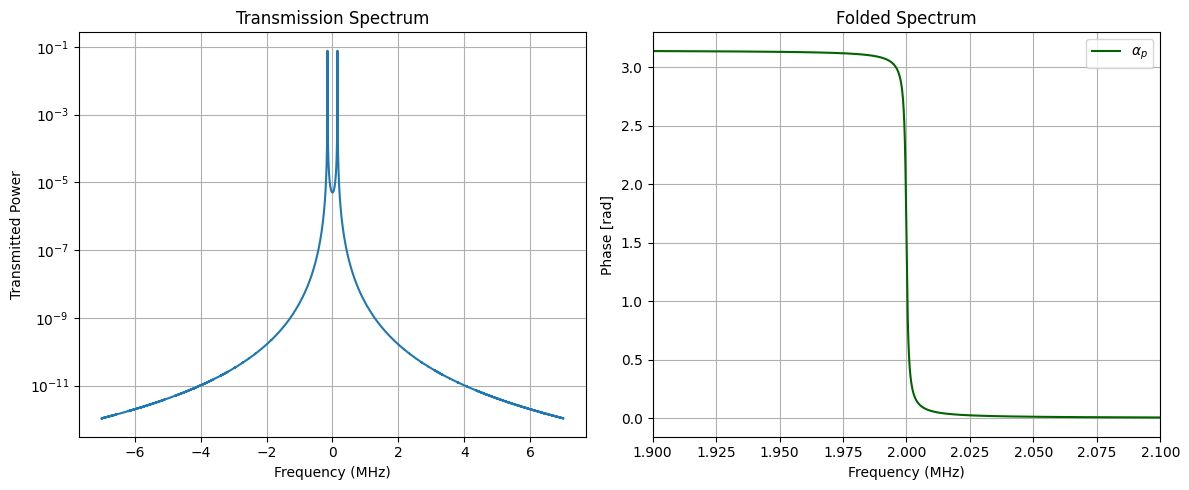

In [85]:
nu_range = np.linspace(-7e6, 7e6, 10000000) # 10k originally
detuning = -2e6  # Detuning value

# Compute transmission power spectrum
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range])
print(res_1, res_2)

# Compute folded spectrum
ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning)

# Create subplots: Transmission power (left) and Folded spectrum (right)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ranges / (2*np.pi) * 1e-6, values)
axes[0].set_yscale("log")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Transmitted Power")
axes[0].set_title("Transmission Spectrum")
axes[0].grid()

axes[1].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, c="darkgreen", label=r"$\alpha_p$")
axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_ylabel("Phase [rad]")
axes[1].set_title("Folded Spectrum")
axes[1].legend()
axes[1].grid()
axes[1].set_xlim(1.9, 2.1)  


# Adjust layout and show
plt.tight_layout()
plt.show()


##### reflected phase (folded spectrum)

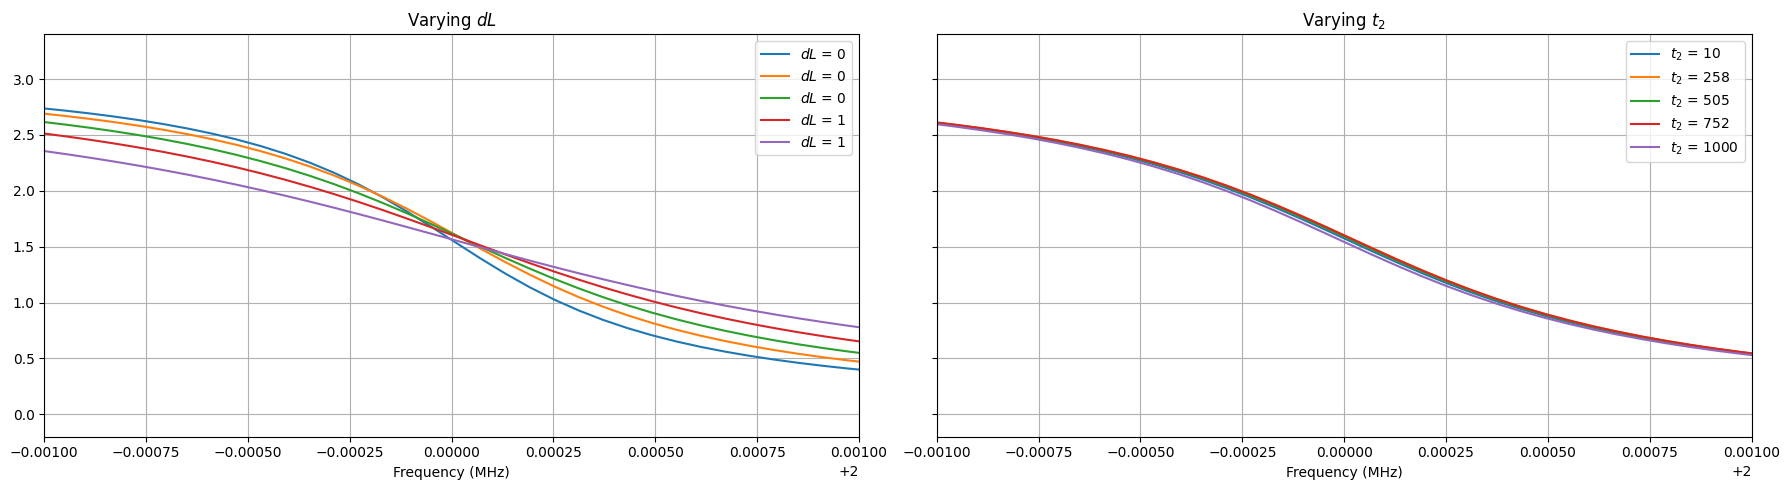

In [86]:
detuning_values = np.linspace(-3e6, 3e6, 5)  # Varying detuning
dL_values = np.linspace(0.3, 0.7, 5)  # Varying dL
t2_values = np.linspace(10e-6, 1000e-6, 5)  # Varying t2

# Fixed values
dL_fixed = 0.5
t1_fixed = 50e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6  # Fixed detuning when varying dL/t2

nu_range = np.linspace(-30e6, 30e6, 1000000)

fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
titles = ["Varying Detuning", "Varying $dL$", "Varying $t_2$"]


for dL in dL_values:
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                        {L1: 1-dL, delta1: 0, L2: dL, delta2: 0}, 
                        subs_dict, 
                        {L1: 1-dL, delta1: 0, L2: dL, delta2: 0}, 
                        [omega])
    
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes[0].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, label=f"$dL$ = {dL:.0f}")

axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_title(titles[1])
axes[0].legend()
axes[0].grid()
axes[0].set_xlim(1.999, 2.001)
axes[0].set_ylim([-0.2, 3.4])

# --- Third Graph: Varying t2 ---
for t2 in t2_values:
    cavity = Cavity_num([t1_fixed, t2, t3_fixed], 
                        {L1: 1-dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0}, 
                        subs_dict, 
                        {L1: 1-dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0}, 
                        [omega])
    
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    axes[1].plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, label=f"$t_2$ = {t2*1e6:.0f}")

axes[1].set_xlabel("Frequency (MHz)")
axes[1].set_title(titles[2])
axes[1].legend()
axes[1].grid()
axes[1].set_xlim(1.999, 2.001)
axes[1].set_ylim([-0.2, 3.4])

plt.tight_layout()
plt.show()


# find mim way to vary slope

# explore perhaps the setup where there is a huge asymmetry between the peaks 

#unwrap arctan k differerntly

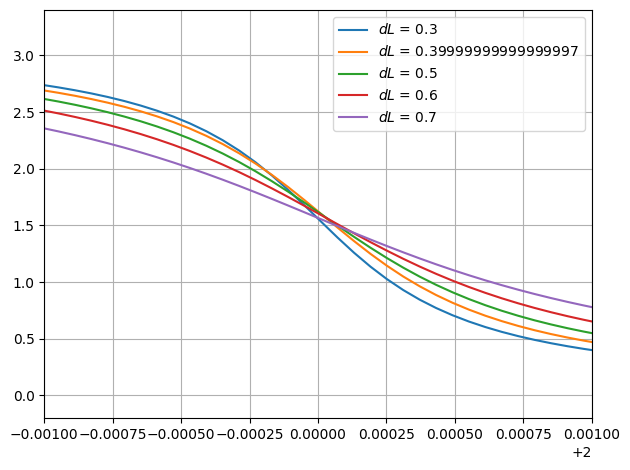

In [75]:
detuning_values = np.linspace(-3e6, 3e6, 5)  # Varying detuning
dL_values = np.linspace(0.3, 0.7, 5)  # Varying dL
t2_values = np.linspace(10e-6, 1000e-6, 5)  # Varying t2

# Fixed values
dL_fixed = 0.5
t1_fixed = 50e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6  # Fixed detuning when varying dL/t2

nu_range = np.linspace(-30e6, 30e6, 1000000)

titles = ["Varying Detuning", "Varying $dL$", "Varying $t_2$"]

for dL in dL_values:
    cavity = Cavity_num([t1_fixed, t2_fixed, t3_fixed], 
                        {L1: 1-dL, delta1: 0, L2: dL, delta2: 0}, 
                        subs_dict, 
                        {L1: 1-dL, delta1: 0, L2: dL, delta2: 0}, 
                        [omega])
    
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    plt.plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, label=f"$dL$ = {dL}")

plt.grid()
plt.xlim([1.999, 2.001])
plt.ylim([-0.2, 3.4])
plt.legend()
plt.tight_layout()
plt.show()


# find mim way to vary slope

# explore perhaps the setup where there is a huge asymmetry between the peaks 

#unwrap arctan k differerntly

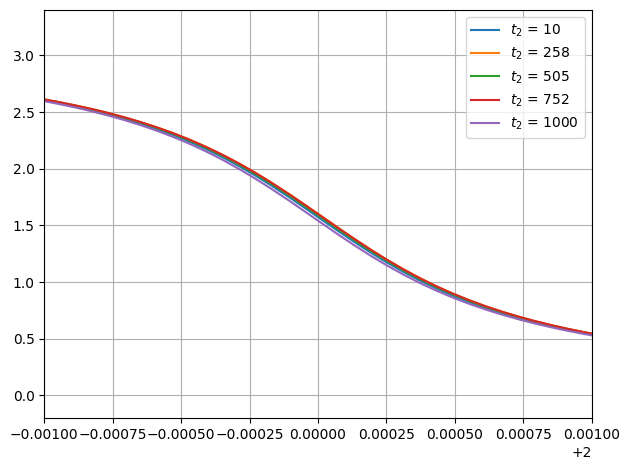

In [87]:
detuning_values = np.linspace(-3e6, 3e6, 5)  # Varying detuning
dL_values = np.linspace(0.3, 0.7, 5)  # Varying dL
t2_values = np.linspace(10e-6, 1000e-6, 5)  # Varying t2

# Fixed values
dL_fixed = 0.5
t1_fixed = 50e-6
t2_fixed = 50e-6
t3_fixed = 2e-6
detuning_fixed = -2e6  # Fixed detuning when varying dL/t2

nu_range = np.linspace(-30e6, 30e6, 1000000)

titles = ["Varying Detuning", "Varying $dL$", "Varying $t_2$"]

for t2 in t2_values:
    cavity = Cavity_num([t1_fixed, t2, t3_fixed], 
                        {L1: 1-dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0}, 
                        subs_dict, 
                        {L1: 1-dL_fixed, delta1: 0, L2: dL_fixed, delta2: 0}, 
                        [omega])
    
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([nu_range], detuning_fixed)
    plt.plot(ranges_folded / (2*np.pi) * 1e-6, values_folded, label=f"$t_2$ = {t2*1e6:.0f}")

plt.grid()
plt.xlim([1.999, 2.001])
plt.ylim([-0.2, 3.4])
plt.legend()
plt.tight_layout()
plt.show()


# find mim way to vary slope

# explore perhaps the setup where there is a huge asymmetry between the peaks 

#unwrap arctan k differerntly

#### optimal == MIM, t2 = 5e-6 seems

### Curve fit 

In [93]:
# IDEA fit the derivative instead of the function directly and maybe itll be less violent

In [88]:
def target_response(power, mass, finess, L, omega_m, Q, wavelength, freq_array):
    omega_laser = Symbol("Omega_laser")
    chi = Symbol("Chi")
    omega = Symbol('Omega')
    c = 3e8
    damping = omega_m / Q
    fsrOM = c/ (2 * L)
    kappaOM = fsrOM / finess
    omega_arr = 2 * np.pi * freq_array

    chi = (mass * (omega_m ** 2 - omega ** 2 + 1j * damping * omega)) ** (-1)
    omega_laser = 2 * np.pi * c / wavelength

    K = sp.atan((16 * omega_laser * power) / (c * L * kappaOM) * chi)
    K_diff = sp.diff(K, omega)
    K_func = sp.lambdify(omega, K)
    values = K_func(omega_arr)

    K_diff_func = sp.lambdify(omega, K_diff)

    values = K_func(omega_arr)
    derivatives = K_diff_func(omega_arr) 

    return omega_arr, np.angle(values), derivatives


In [91]:
P = 1e-3
m = 10e-9
F = 1000
Q = 10e3
L = 1e3
omega_m = 2e6 * 2 * np.pi
freq_arr = np.linspace(-5e6, 5e6, 10000000)

c:\Users\HP\anaconda3\envs\py38\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


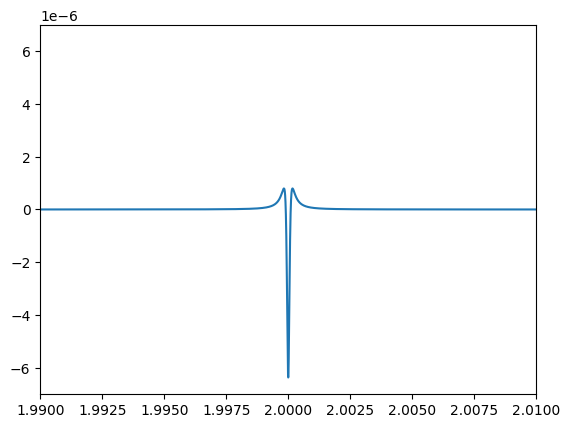

In [101]:
omegas, values, derivative = target_response(P, m, F, L, omega_m, Q, 1064e-9, freq_arr)
plt.plot(omegas/(2*np.pi) * 1e-6, derivative) 

plt.xlim([1.99, 2.01])
# plt.ylim([-0.3, 3.5])


#### MATE config fit

In [41]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")


subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
detuning = 2e6

def fit_func(freq_array, dL, t2_sub):
    mask = (freq_array >= 1.99e6) & (freq_array <= 2.01e6)  
    subs_dict_num = {L1: 1-dL, delta1:0, L2:dL, delta2: 0}
    mirror_vals = {t1: 50e-6, t2: t2_sub, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([freq_array], detuning)
    return np.array(values_folded)[mask]

In [42]:
initial_guess = [800e-6, 10e-6]
lower_bounds = [200e-6, 10e-6]
upper_bounds = [5000e-6, 1]
freq_arr = np.linspace(-5e6, 5e6, 10000000)


opt_params, _ = curve_fit(fit_func, freq_arr, target_vals, p0=initial_guess, bounds=(lower_bounds, upper_bounds))

# Extract Fitted Parameters
fitted_dL, fitted_t2 = opt_params
# budda, market, czy kupił cos i wwiozl bez problemu, trip.com best pociagi, hostele moze polecic, zawsze zel do rak i papier!!


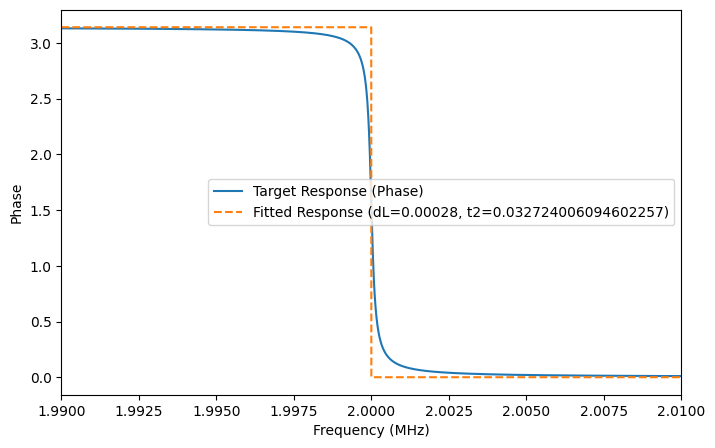

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(omegas/(2*np.pi)*1e-6, np.angle(values)+np.pi, label="Target Response (Phase)")
plt.plot(np.linspace(1.99e6, 2.01e6, 20000)*1e-6, fit_func(freq_arr, fitted_dL, fitted_t2), label=f"Fitted Response (dL={fitted_dL:.5f}, t2={fitted_t2})", linestyle="--")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase")
plt.legend()
plt.xlim(1.99, 2.01)
plt.show()

### MIM config

In [115]:
initial_guess = [0.5, 10e-6]
lower_bounds = [5000e-6, 10e-6]
upper_bounds = [0.9, 1]


target_vals = np.angle(values) + np.pi
freq_arr = np.linspace(-5e6, 5e6, 1000000)

opt_params, _ = curve_fit(fit_func, freq_arr, target_vals, p0=initial_guess, bounds=(lower_bounds, upper_bounds))


fitted_dL, fitted_t2 = opt_params

plt.figure(figsize=(8, 5))
plt.plot(omegas/(2*np.pi)*1e-6, target_vals, label="Target Response (Phase)")
plt.plot(freq_arr*1e-6, fit_func(freq_arr, fitted_dL, fitted_t2), label="Fitted Response", linestyle="--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.show()

# interrupted after 13 min

KeyboardInterrupt: 

### Dłuższy rezonator laboratorium wytrzyma


MATE

In [ ]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")


subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
detuning = -2e6

def fit_func(freq_array, dL, t2_sub):
    subs_dict_num = {L1: 2-dL, delta1:0, L2:dL, delta2: 0}
    mirror_vals = {t1: 50e-6, t2: t2_sub, t3: 1e-6}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    ranges_folded, values_folded = cavity.folded_spectrum_reflected([freq_array], detuning)
    return values_folded

In [ ]:
initial_guess = [800e-6, 10e-6]
lower_bounds = [200e-6, 10e-6]
upper_bounds = [5000e-6, 1]


target_vals = np.angle(values) + np.pi
freq_arr = np.linspace(-5e6, 5e6, 1000000)

opt_params, _ = curve_fit(fit_func, freq_arr, target_vals, p0=initial_guess, bounds=(lower_bounds, upper_bounds))

# Extract Fitted Parameters
fitted_dL, fitted_t2 = opt_params



c:\Users\HP\anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


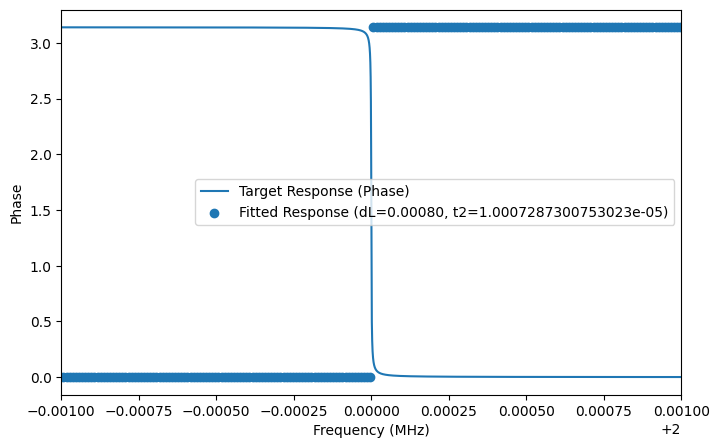

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(omegas/(2*np.pi)*1e-6, np.angle(values)+np.pi, label="Target Response (Phase)")
plt.scatter(freq_arr*1e-6, fit_func(freq_arr, fitted_dL, fitted_t2), label=f"Fitted Response (dL={fitted_dL:.5f}, t2={fitted_t2})") # linestyle="--"
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase")
plt.legend()
plt.xlim([1.999, 2.001])
plt.show()

MIM

initial_guess = [0.5, 10e-6]
lower_bounds = [5000e-6, 10e-6]
upper_bounds = [0.9, 1]


target_vals = np.angle(values) + np.pi
freq_arr = np.linspace(-5e6, 5e6, 1000000)

opt_params, _ = curve_fit(fit_func, freq_arr, target_vals, p0=initial_guess, bounds=(lower_bounds, upper_bounds))


fitted_dL, fitted_t2 = opt_params

plt.figure(figsize=(8, 5))
plt.plot(omegas/(2*np.pi)*1e-6, target_vals, label="Target Response (Phase)")
plt.plot(freq_arr*1e-6, fit_func(freq_arr, fitted_dL, fitted_t2), label="Fitted Response", linestyle="--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.show()